# Sentiment Analysis Carrying forward Module 16.2

In module 16.2, we pre-processed the text. Let us now try to build a model.

# 1: Importing Necessary Libraries

In this cell, we'll import the necessary libraries to handle data processing and text cleaning. These include pandas for data manipulation, NLTK for natural language processing, and contractions for handling contractions in the text.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# 2: Reading Data

Here we are reading the 'Tweets.csv' file into a DataFrame. We're using the 'utf-8' encoding to avoid issues with special characters.

The tweets I collected were on Apple's iPhone

In [2]:
with open('indeed_scrape_clean.csv', encoding='utf-8') as f:
    rws = pd.read_csv(f)

In [3]:
rws.head()

,Unnamed: 0,text,selected_text,sentiment,no_contract,tokenized,lower,no_punc,stopwords_removed,filtered,pos_tags,wordnet_pos,lemmatized
0,0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"['I`d', 'have', 'responded,', 'if', 'I', 'were...","['I', '`', 'd', 'have', 'responded', ',', 'if'...","['i', '`', 'd', 'have', 'responded', ',', 'if'...","['i', 'd', 'have', 'responded', 'if', 'i', 'we...","['`', 'responded', ',', 'going']","['', 'responded', '', 'going']","[('`', '``'), ('responded', 'VBD'), (',', ',')...","[('`', 'n'), ('responded', 'v'), (',', 'n'), (...","['`', 'respond', ',', 'go']"
1,1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"['Sooo', 'SAD', 'I', 'will', 'miss', 'you', 'h...","['Sooo', 'SAD', 'I', 'will', 'miss', 'you', 'h...","['sooo', 'sad', 'i', 'will', 'miss', 'you', 'h...","['sooo', 'sad', 'i', 'will', 'miss', 'you', 'h...","['Sooo', 'SAD', 'miss', 'San', 'Diego', '!', '...","['Sooo', 'SAD', 'miss', 'San', 'Diego', '', ''...","[('Sooo', 'NNP'), ('SAD', 'NNP'), ('miss', 'VB...","[('Sooo', 'n'), ('SAD', 'n'), ('miss', 'v'), (...","['Sooo', 'SAD', 'miss', 'San', 'Diego', '!', '..."
2,2,my boss is bullying me...,bullying me,negative,"['my', 'boss', 'is', 'bullying', 'me...']","['my', 'boss', 'is', 'bullying', 'me', '...']","['my', 'boss', 'is', 'bullying', 'me', '...']","['my', 'boss', 'is', 'bullying', 'me', '...']","['boss', 'bullying', '...']","['boss', 'bullying', '']","[('boss', 'IN'), ('bullying', 'NN'), ('...', '...","[('boss', 'n'), ('bullying', 'n'), ('...', 'n')]","['bos', 'bullying', '...']"
3,3,what interview! leave me alone,leave me alone,negative,"['what', 'interview!', 'leave', 'me', 'alone']","['what', 'interview', '!', 'leave', 'me', 'alo...","['what', 'interview', '!', 'leave', 'me', 'alo...","['what', 'interview', 'leave', 'me', 'alone']","['interview', '!', 'leave', 'alone']","['interview', '', 'leave', 'alone']","[('interview', 'NN'), ('!', '.'), ('leave', 'V...","[('interview', 'n'), ('!', 'n'), ('leave', 'v'...","['interview', '!', 'leave', 'alone']"
4,4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"['Sons', 'of', '****,', 'why', 'couldn`t', 'th...","['Sons', 'of', '*', '*', '*', '*', ',', 'why',...","['sons', 'of', '*', '*', '*', '*', ',', 'why',...","['sons', 'of', 'why', 'couldn', 't', 'they', '...","['Sons', '*', '*', '*', '*', ',', '`', 'put', ...","['Sons', '', '', '', '', '', '', 'put', 'relea...","[('Sons', 'NNS'), ('*', 'VBP'), ('*', 'JJ'), (...","[('Sons', 'n'), ('*', 'v'), ('*', 'a'), ('*', ...","['Sons', '*', '*', '*', '*', ',', '`', 'put', ..."


In [4]:
rws.shape

(27480, 13)

By specifying the encoding as 'utf-8', you're informing the system to interpret the bytes in the file using the UTF-8 encoding, which usually handles special characters well.

Make sure that the CSV file is actually encoded in UTF-8. If you still encounter issues, you may want to open the CSV file in a text editor that allows you to view and change the encoding (such as Notepad++), and make sure it's saved in UTF-8 format.

# 3: Encoding Sentiment Labels

First, we need to encode the sentiment labels into numerical values, as models can't handle textual labels.

In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode the sentiment column
encoder = LabelEncoder()
rws['sentiment_encoded'] = encoder.fit_transform(rws['sentiment'])

In [6]:
rws.head()

,Unnamed: 0,text,selected_text,sentiment,no_contract,tokenized,lower,no_punc,stopwords_removed,filtered,pos_tags,wordnet_pos,lemmatized,sentiment_encoded
0,0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"['I`d', 'have', 'responded,', 'if', 'I', 'were...","['I', '`', 'd', 'have', 'responded', ',', 'if'...","['i', '`', 'd', 'have', 'responded', ',', 'if'...","['i', 'd', 'have', 'responded', 'if', 'i', 'we...","['`', 'responded', ',', 'going']","['', 'responded', '', 'going']","[('`', '``'), ('responded', 'VBD'), (',', ',')...","[('`', 'n'), ('responded', 'v'), (',', 'n'), (...","['`', 'respond', ',', 'go']",1
1,1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"['Sooo', 'SAD', 'I', 'will', 'miss', 'you', 'h...","['Sooo', 'SAD', 'I', 'will', 'miss', 'you', 'h...","['sooo', 'sad', 'i', 'will', 'miss', 'you', 'h...","['sooo', 'sad', 'i', 'will', 'miss', 'you', 'h...","['Sooo', 'SAD', 'miss', 'San', 'Diego', '!', '...","['Sooo', 'SAD', 'miss', 'San', 'Diego', '', ''...","[('Sooo', 'NNP'), ('SAD', 'NNP'), ('miss', 'VB...","[('Sooo', 'n'), ('SAD', 'n'), ('miss', 'v'), (...","['Sooo', 'SAD', 'miss', 'San', 'Diego', '!', '...",0
2,2,my boss is bullying me...,bullying me,negative,"['my', 'boss', 'is', 'bullying', 'me...']","['my', 'boss', 'is', 'bullying', 'me', '...']","['my', 'boss', 'is', 'bullying', 'me', '...']","['my', 'boss', 'is', 'bullying', 'me', '...']","['boss', 'bullying', '...']","['boss', 'bullying', '']","[('boss', 'IN'), ('bullying', 'NN'), ('...', '...","[('boss', 'n'), ('bullying', 'n'), ('...', 'n')]","['bos', 'bullying', '...']",0
3,3,what interview! leave me alone,leave me alone,negative,"['what', 'interview!', 'leave', 'me', 'alone']","['what', 'interview', '!', 'leave', 'me', 'alo...","['what', 'interview', '!', 'leave', 'me', 'alo...","['what', 'interview', 'leave', 'me', 'alone']","['interview', '!', 'leave', 'alone']","['interview', '', 'leave', 'alone']","[('interview', 'NN'), ('!', '.'), ('leave', 'V...","[('interview', 'n'), ('!', 'n'), ('leave', 'v'...","['interview', '!', 'leave', 'alone']",0
4,4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"['Sons', 'of', '****,', 'why', 'couldn`t', 'th...","['Sons', 'of', '*', '*', '*', '*', ',', 'why',...","['sons', 'of', '*', '*', '*', '*', ',', 'why',...","['sons', 'of', 'why', 'couldn', 't', 'they', '...","['Sons', '*', '*', '*', '*', ',', '`', 'put', ...","['Sons', '', '', '', '', '', '', 'put', 'relea...","[('Sons', 'NNS'), ('*', 'VBP'), ('*', 'JJ'), (...","[('Sons', 'n'), ('*', 'v'), ('*', 'a'), ('*', ...","['Sons', '*', '*', '*', '*', ',', '`', 'put', ...",0


# 4: Splitting Data into Training and Testing Sets

You need to convert the text into numerical form by using techniques like TF-IDF or Bag of Words.

In [7]:
X = rws['lemmatized'].apply(lambda x: ' '.join(eval(x)))
y = rws['sentiment_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5: Text Vectorization

You need to convert the text into numerical form by using techniques like TF-IDF or Bag of Words.

In [8]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [9]:
X_train_vectorized

<21984x21128 sparse matrix of type '<class 'numpy.float64'>'
	with 152936 stored elements in Compressed Sparse Row format>

# 6: Building a Sentiment Analysis Model

You can build a model using algorithms like Random Forest, Logistic Regression, etc. Here's an example using Logistic Regression.

In [10]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Making predictions
y_pred = model.predict(X_test_vectorized)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.6826783114992722
              precision    recall  f1-score   support

           0       0.70      0.58      0.63      1572
           1       0.62      0.73      0.67      2236
           2       0.77      0.71      0.74      1688

    accuracy                           0.68      5496
   macro avg       0.70      0.68      0.68      5496
weighted avg       0.69      0.68      0.68      5496



C:\Users\M275603\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 7: Confusion Matrix

You can use confusion_matrix from sklearn.metrics to create a confusion matrix.

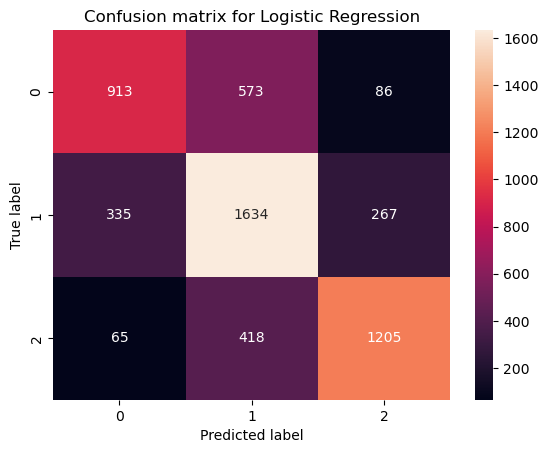

In [11]:
# For Logistic Regression
y_pred = model.predict(X_test_vectorized)
cm = confusion_matrix(y_test, y_pred)

# Visualization
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix for Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 8: ROC Metrics 

ROC curves are typically used for binary classification. If you have a multi-class problem, the ROC can be generated using either of the two options:

**1.One-vs-All ROC Curve**: You can plot the ROC curve for each class against the rest. This approach treats the problem as a series of binary classification tasks.

**2.Micro and Macro Averaging**: You can compute the micro and macro average ROC curves. Micro-averaging aggregates the contributions of all classes, whereas macro-averaging computes the metric independently for each class and then takes the average.

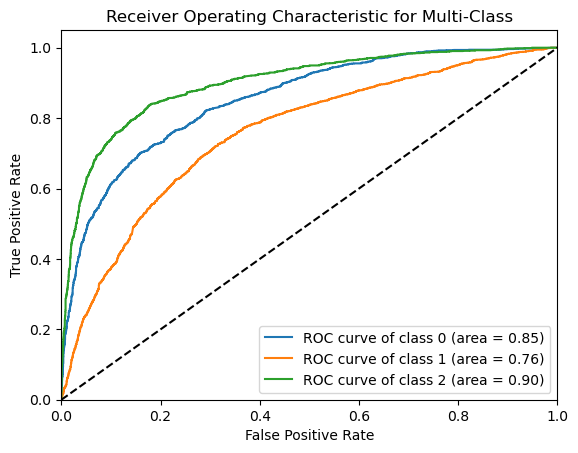

In [12]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])  # Assuming you have 3 classes
n_classes = y.shape[1]

# Split into training and testing again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Learn to predict each class against the other using the classifier of your choice
classifier = OneVsRestClassifier(LogisticRegression())
y_score = classifier.fit(X_train_vectorized, y_train).decision_function(X_test_vectorized)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vectorized, y_train)
rf_y_pred = rf_model.predict(X_test_vectorized)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f'Random Forest Accuracy: {rf_accuracy}')
print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train_vectorized, y_train)
svm_y_pred = svm_model.predict(X_test_vectorized)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f'SVM Accuracy: {svm_accuracy}')
print(confusion_matrix(y_test, svm_y_pred))
print(classification_report(y_test, svm_y_pred))